In [ ]:
import nltk
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from matplotlib import style
style.use('ggplot')

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/AI_project_dataset_25k.csv")
data.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/1000355-adventures_of_robin_hood,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,5-May,8/21/2002,The classic swashbukler. They don't get better...
1,m/1000355-adventures_of_robin_hood,Kevin N. Laforest,False,Montreal Film Journal,Fresh,4-Apr,9/10/2002,Wanna smile? A lot? Rent this movie.
2,m/1000355-adventures_of_robin_hood,Nell Minow,False,Movie Mom,Fresh,5-May,9/19/2002,One of the most thrilling adventures ever put ...
3,m/1000355-adventures_of_robin_hood,Jeffrey Westhoff,False,"Northwest Herald (Crystal Lake, IL)",Fresh,4-Apr,10/17/2002,The Adventures of Robin Hood shows the studio ...
4,m/1000355-adventures_of_robin_hood,Frank S. Nugent,True,New York Times,Fresh,5-May,5/20/2003,Few storybooks have been more brilliantly brou...


In [ ]:
data['review_type'].value_counts()

Fresh     16234
Rotten     9223
Name: review_type, dtype: int64

Text(0.5, 1.0, 'Sentiment Distribution')

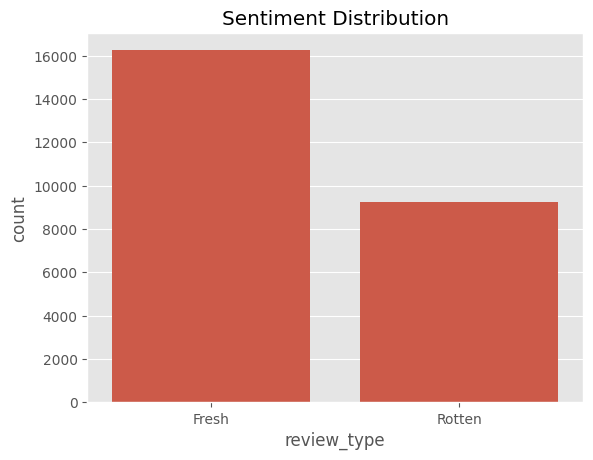

In [ ]:
sns.countplot(x='review_type', data=data)
plt.title('Sentiment Distribution' )

In [ ]:
for i in range(5):
  print("Review: ", [i])
  print(data['review_content'].iloc[i], "\n")
  print("Sentiment: ", data['review_type'].iloc[i])

Review:  [0]
The classic swashbukler. They don't get better than this 

Sentiment:  Fresh
Review:  [1]
Wanna smile? A lot? Rent this movie. 

Sentiment:  Fresh
Review:  [2]
One of the most thrilling adventures ever put on film, every frame, performance, music theme, and line a masterpiece. 

Sentiment:  Fresh
Review:  [3]
The Adventures of Robin Hood shows the studio system could produce works of pure energy and joy. 

Sentiment:  Fresh
Review:  [4]
Few storybooks have been more brilliantly brought to life, page for page, chapter for chapter, derring-do for derring-do. 

Sentiment:  Fresh


In [ ]:
def no_of_words(text):
  words = text.split()
  word_count = len(words)
  return word_count

In [ ]:
data['word_count'] = data['review_content'].apply(no_of_words)
data.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,word_count
0,m/1000355-adventures_of_robin_hood,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,5-May,8/21/2002,The classic swashbukler. They don't get better...,9
1,m/1000355-adventures_of_robin_hood,Kevin N. Laforest,False,Montreal Film Journal,Fresh,4-Apr,9/10/2002,Wanna smile? A lot? Rent this movie.,7
2,m/1000355-adventures_of_robin_hood,Nell Minow,False,Movie Mom,Fresh,5-May,9/19/2002,One of the most thrilling adventures ever put ...,19
3,m/1000355-adventures_of_robin_hood,Jeffrey Westhoff,False,"Northwest Herald (Crystal Lake, IL)",Fresh,4-Apr,10/17/2002,The Adventures of Robin Hood shows the studio ...,17
4,m/1000355-adventures_of_robin_hood,Frank S. Nugent,True,New York Times,Fresh,5-May,5/20/2003,Few storybooks have been more brilliantly brou...,18


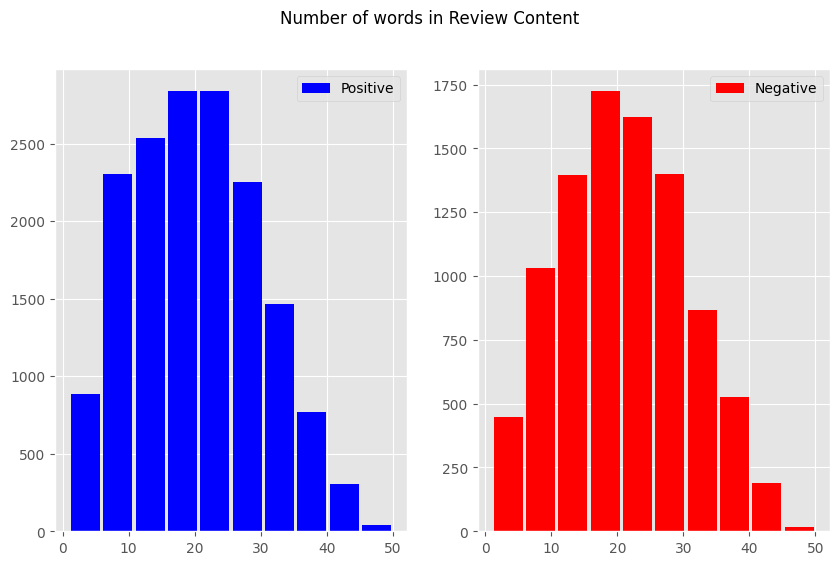

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(data[data['review_type'] == 'Fresh']['word_count'], label = 'Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(data[data['review_type'] == 'Rotten']['word_count'], label = 'Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in Review Content")
plt.show()

In [ ]:
data.review_type.replace("Fresh", 1, inplace=True)
data.review_type.replace("Rotten", 0, inplace=True)
# data.head()

In [ ]:
x = data['review_content']
y = data['review_type']

In [ ]:
# print(x)

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(x):
    x = x.lower()  # Convert text to lowercase
    x = re.sub(r'[^a-zA-Z0-9\s]', '', x) # Remove non-alphanumeric characters
    x = re.sub(r"https\S+|www\S+|htp\S+", '',x, flags = re.MULTILINE) # Remove urls
    x = re.sub(r"\@w+|\#"," ", x) # Remove special characters
    x = re.sub(r'[^\w\s]'," ", x) # Remove punctuations
    text_tokens = word_tokenize(x)
    filtered_text = [w for w in text_tokens if not w in stop_words] # Remove stopwords
    return " ".join(filtered_text)

In [ ]:
dataset = data['review_content'].apply(preprocess_text)
dataset

0                      classic swashbukler dont get better
1                              wan na smile lot rent movie
2        one thrilling adventures ever put film every f...
3        adventures robin hood shows studio system coul...
4        storybooks brilliantly brought life page page ...
                               ...                        
25452    arguably last great movie westerns real star s...
25453    unforgiven thus rejects eastwoods previous fil...
25454    undeniable classic reasons cant acknowledge la...
25455    astoundingly powerful tale strangely antiold w...
25456    movie considerable qualities among martins per...
Name: review_content, Length: 25457, dtype: object

<ipython-input-72-20477242289b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


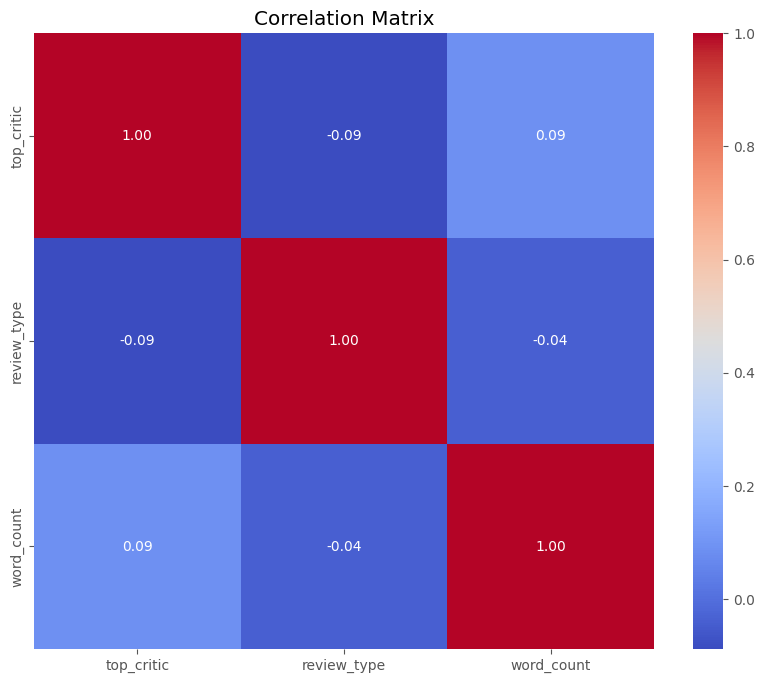

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import json

!pip install afinn
from afinn import Afinn

afinn = Afinn()

In [ ]:
for val in dataset:
  # print(val)
  tokens = nltk.word_tokenize(val)
  # print(tokens)

In [ ]:
from afinn import Afinn
import nltk
nltk.download('punkt')

afinn = Afinn()

# Overall sentiment score for the entire dataset
overall_sentiment_score = 0

# Iterate through each element in 'dataset'
for val in dataset:
    print("Processed Text:", val)

    # Tokenize the text into words
    tokens = nltk.word_tokenize(val)
    print("Tokens:")

    # Calculate and print sentiment score for each tokenized word
    token_sentiments = []
    for token in tokens:
        sentiment_score = afinn.score(token)
        token_sentiments.append(sentiment_score)
        print(f"AFINN Sentiment Score for '{token}': {sentiment_score}")

    # Calculate and print overall sentiment score for the text
    text_sentiment_score = sum(token_sentiments)
    overall_sentiment_score += text_sentiment_score
    overall_sentiment = 'Positive' if text_sentiment_score > 0 else ('Negative' if text_sentiment_score < 0 else 'Neutral')
    print(f"Overall Sentiment for the text: {overall_sentiment} (Score: {text_sentiment_score})")

    print("\n")

print(f"Overall Sentiment for the entire dataset: {'Positive' if overall_sentiment_score > 0 else ('Negative' if overall_sentiment_score < 0 else 'Neutral')} (Score: {overall_sentiment_score})")


<ipython-input-140-7db421fac0a3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette="viridis")


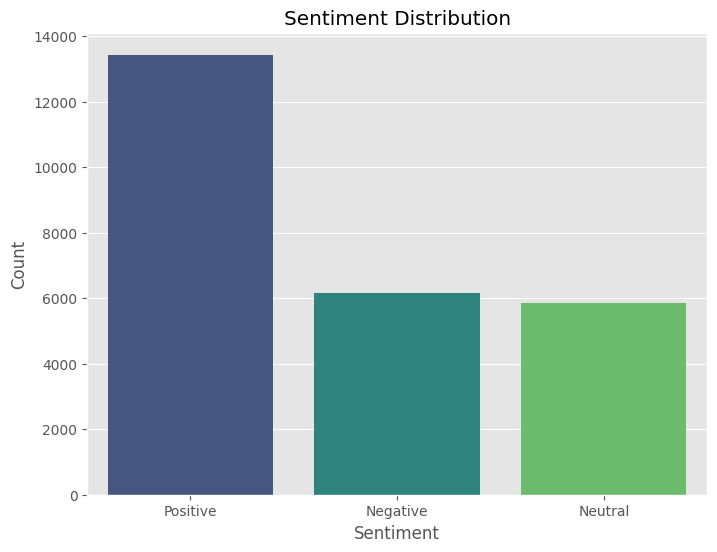

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' contains the resulting DataFrame with sentiment scores and classification
sentiment_distribution = data['review'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette="viridis")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score


accuracy_afinn = accuracy_score(data['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative')), data['review'])
print(f"Accuracy of the AFINN rule-based approach: {accuracy_afinn * 100:.2f}%")


Accuracy of the AFINN rule-based approach: 100.00%


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
colors = {'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}
plt.scatter(data['sentiment_score'], data['review'].map(colors), alpha=0.5)
plt.xlabel('Sentiment Score')
plt.ylabel('Sentiment Label')
plt.title('Sentiment Score vs. Sentiment Label')
plt.legend(colors)
plt.grid(True)
plt.show()

In [ ]:
pos_reviews = data[data.review_type == 'Negative']
pos_reviews

In [ ]:
duplicated_entries = data.duplicated().sum()
print("Number of duplicated entries: ", duplicated_entries)

Number of duplicated entries:  0


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
pos_reviews = data[data.review_type == 1]
pos_reviews.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,word_count,Cleaned_Review,sentiment_score,review
0,m/1000355-adventures_of_robin_hood,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",1,5-May,8/21/2002,The classic swashbukler. They don't get better...,9,classic swashbukler dont get better,2.0,Positive
1,m/1000355-adventures_of_robin_hood,Kevin N. Laforest,False,Montreal Film Journal,1,4-Apr,9/10/2002,Wanna smile? A lot? Rent this movie.,7,wan na smile lot rent movie,2.0,Positive
2,m/1000355-adventures_of_robin_hood,Nell Minow,False,Movie Mom,1,5-May,9/19/2002,One of the most thrilling adventures ever put ...,19,one thrilling adventures ever put film every f...,6.0,Positive
3,m/1000355-adventures_of_robin_hood,Jeffrey Westhoff,False,"Northwest Herald (Crystal Lake, IL)",1,4-Apr,10/17/2002,The Adventures of Robin Hood shows the studio ...,17,adventures robin hood shows studio system coul...,6.0,Positive
4,m/1000355-adventures_of_robin_hood,Frank S. Nugent,True,New York Times,1,5-May,5/20/2003,Few storybooks have been more brilliantly brou...,18,storybooks brilliantly brought life page page ...,0.0,Neutral


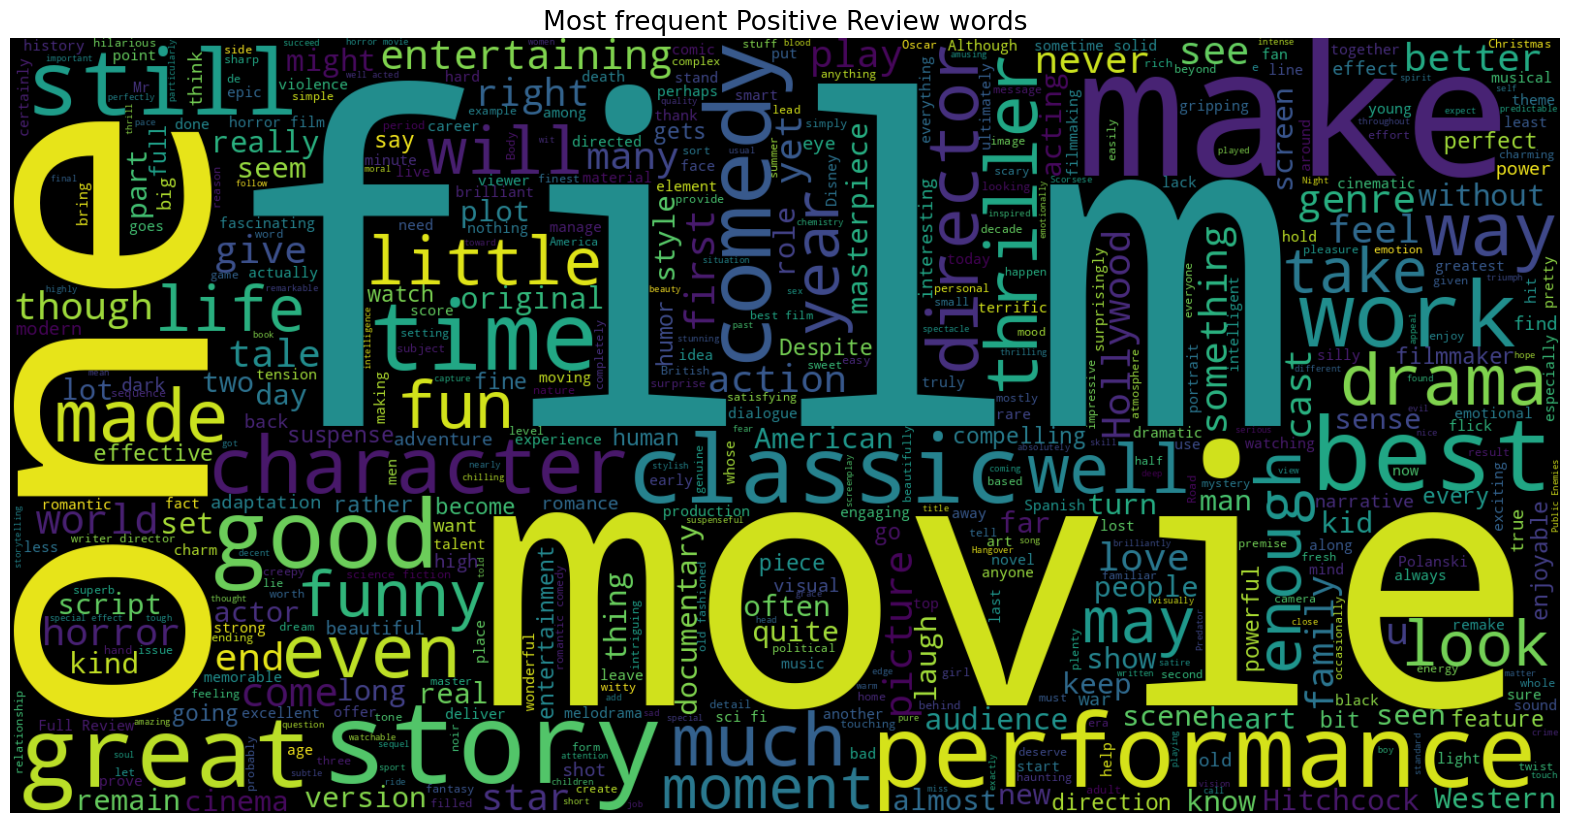

In [ ]:
text = ' '.join([word for word in pos_reviews['review_content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent Positive Review words', fontsize=19)
plt.show()

In [ ]:
neg_reviews = data[data.review_type == 0]
neg_reviews.head()

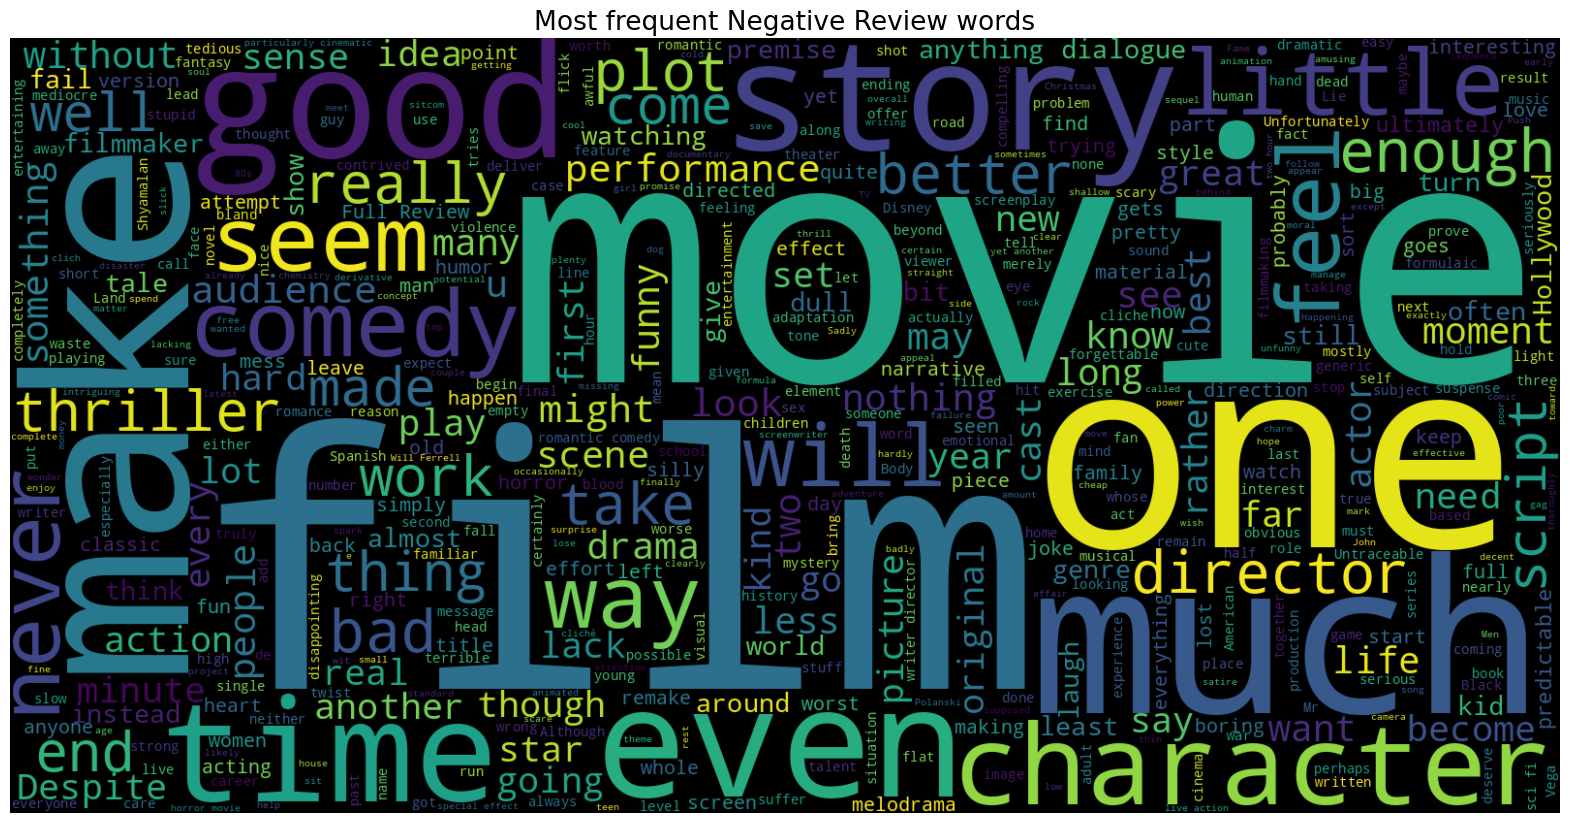

In [ ]:
text = ' '.join([word for word in neg_reviews['review_content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent Negative Review words', fontsize=19)
plt.show()

In [ ]:
data.review_type.replace("Positive", 1, inplace=True)
data.review_type.replace("Negative", 0, inplace=True)
data.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,word_count,Cleaned_Review,sentiment_score,review
0,m/1000355-adventures_of_robin_hood,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",1,5-May,8/21/2002,The classic swashbukler. They don't get better...,9,classic swashbukler dont get better,2.0,Positive
1,m/1000355-adventures_of_robin_hood,Kevin N. Laforest,False,Montreal Film Journal,1,4-Apr,9/10/2002,Wanna smile? A lot? Rent this movie.,7,wan na smile lot rent movie,2.0,Positive
2,m/1000355-adventures_of_robin_hood,Nell Minow,False,Movie Mom,1,5-May,9/19/2002,One of the most thrilling adventures ever put ...,19,one thrilling adventures ever put film every f...,6.0,Positive
3,m/1000355-adventures_of_robin_hood,Jeffrey Westhoff,False,"Northwest Herald (Crystal Lake, IL)",1,4-Apr,10/17/2002,The Adventures of Robin Hood shows the studio ...,17,adventures robin hood shows studio system coul...,6.0,Positive
4,m/1000355-adventures_of_robin_hood,Frank S. Nugent,True,New York Times,1,5-May,5/20/2003,Few storybooks have been more brilliantly brou...,18,storybooks brilliantly brought life page page ...,0.0,Neutral


In [ ]:
vectorizer = TfidfVectorizer(lowercase=True,
                             max_features=25457,
                             max_df=0.7,
                             min_df=1,
                             ngram_range=(1,1),
)

x = vectorizer.fit_transform(dataset).toarray()

In [ ]:
x.shape

(25457, 25457)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20365, 25457), (5092, 25457), (20365,), (5092,))

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
mnb_predict = mnb.predict(x_test)

print(accuracy_score(y_test, mnb_predict))
print("\n")
print(confusion_matrix(y_test, mnb_predict))
print("\n")
print(classification_report(y_test, mnb_predict))
print("\n")

mnb_acc = accuracy_score(y_test, mnb_predict)
print("Multinomial NB Test accuracy: {:.2f}%".format(mnb_acc*100))

0.7364493322859387


[[ 589 1228]
 [ 114 3161]]


              precision    recall  f1-score   support

           0       0.84      0.32      0.47      1817
           1       0.72      0.97      0.82      3275

    accuracy                           0.74      5092
   macro avg       0.78      0.64      0.65      5092
weighted avg       0.76      0.74      0.70      5092



Multinomial NB Test accuracy: 73.64%


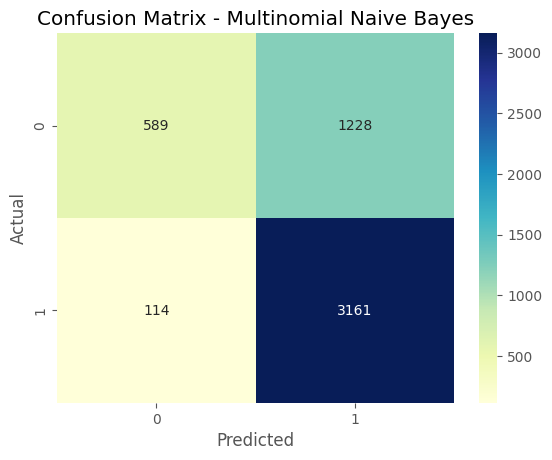

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example for Multinomial Naive Bayes
mnb_conf_matrix = confusion_matrix(y_test, mnb_predict)
sns.heatmap(mnb_conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
pd.DataFrame(np.c_[y_test, mnb_predict], columns=["Actual", "Predicted"])

,Actual,Predicted
0,1,1
1,0,1
2,0,0
3,1,1
4,1,1
...,...,...
5087,1,1
5088,1,1
5089,1,1
5090,1,1


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
logreg_predict = logreg.predict(x_test)

print(accuracy_score(y_test, logreg_predict))
print("\n")
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))
print("\n")

logreg_acc = accuracy_score(y_test, logreg_predict)
print("Logistic Regression test accuracy: {:.2f}%".format(logreg_acc*100))

0.7719952867242734


[[ 963  854]
 [ 307 2968]]


              precision    recall  f1-score   support

           0       0.76      0.53      0.62      1817
           1       0.78      0.91      0.84      3275

    accuracy                           0.77      5092
   macro avg       0.77      0.72      0.73      5092
weighted avg       0.77      0.77      0.76      5092



Logistic Regression test accuracy: 77.20%


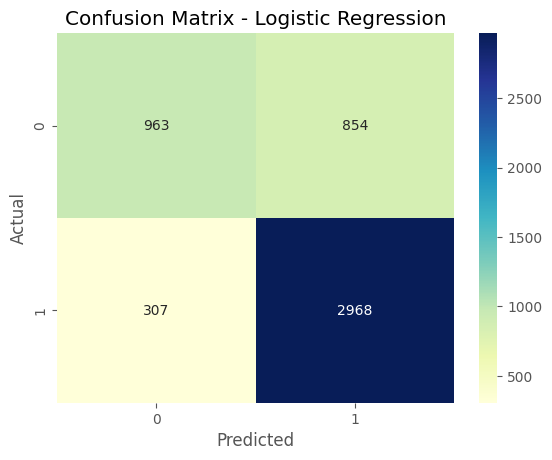

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example for Multinomial Naive Bayes
logreg_conf_matrix = confusion_matrix(y_test, logreg_predict)
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# sns.regplot(x=x_test, y=y_test, data=data, logistic=True, ci=None)#scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

In [ ]:
pd.DataFrame(np.c_[y_test, logreg_predict], columns=["Actual", "Predicted"])

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
5087,1,1
5088,1,1
5089,1,1
5090,1,1


In [ ]:
svc = LinearSVC()
svc.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_predict = svc.predict(x_test)

print(accuracy_score(y_test, svc_predict))
print("\n")
print(confusion_matrix(y_test, svc_predict))
print("\n")
print(classification_report(y_test, svc_predict))
print("\n")

svc_acc = accuracy_score(y_test, svc_predict)
print("Support Vector Classifier test accuracy: {:.2f}%".format(svc_acc*100))

0.7727808326787117


[[1155  662]
 [ 495 2780]]


              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1817
           1       0.81      0.85      0.83      3275

    accuracy                           0.77      5092
   macro avg       0.75      0.74      0.75      5092
weighted avg       0.77      0.77      0.77      5092



Support Vector Classifier test accuracy: 77.28%


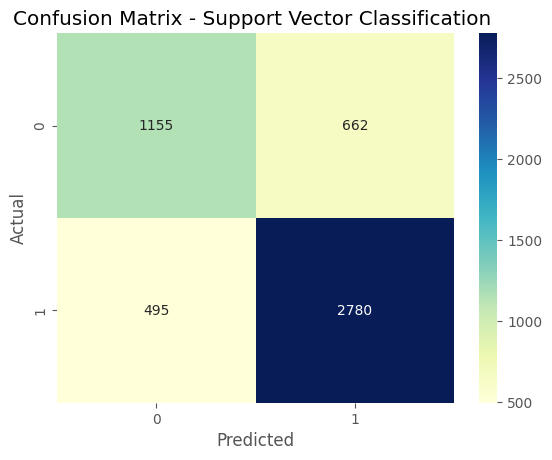

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example for Multinomial Naive Bayes
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix - Support Vector Classification ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
pd.DataFrame(np.c_[y_test, svc_predict], columns=["Actual", "Predicted"])

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
5087,1,1
5088,1,1
5089,1,1
5090,1,1


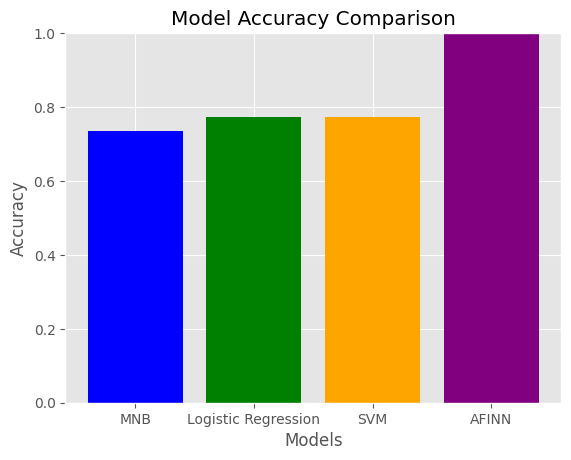

In [ ]:
models = ['MNB', 'Logistic Regression', 'SVM', 'AFINN']
accuracies = [mnb_acc, logreg_acc, svc_acc, accuracy_afinn]

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for accuracy
plt.show()